use suffled3.csv

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime ,timedelta

df=pd.read_csv('suffled3.csv',parse_dates=['Date'], index_col='Date' )


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2020-07-28 to 2015-08-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High          3872 non-null   float64
 2   Low           3872 non-null   float64
 3   Close         3872 non-null   float64
 4   Volume        3872 non-null   int64  
 5   Dividends     3872 non-null   float64
 6   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 242.0 KB


In [6]:
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-28,306.637012,308.326758,304.181926,304.480103,2116300,0.0,0.0
2015-09-17,89.160056,91.267558,89.140805,89.698959,4627000,0.0,0.0


In [7]:
df.sort_index()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0


In [21]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


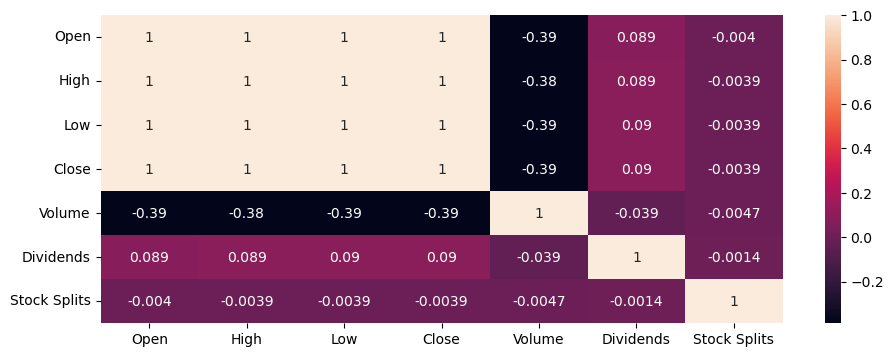

In [22]:
corr_date = df.corr()
fig = plt.figure(figsize =(11, 4)) 
# figsize=(11,1)
ax=sns.heatmap(corr_date, annot=True)
plt.xticks()
plt.show()
#lables

<AxesSubplot: xlabel='Date', ylabel='Close'>

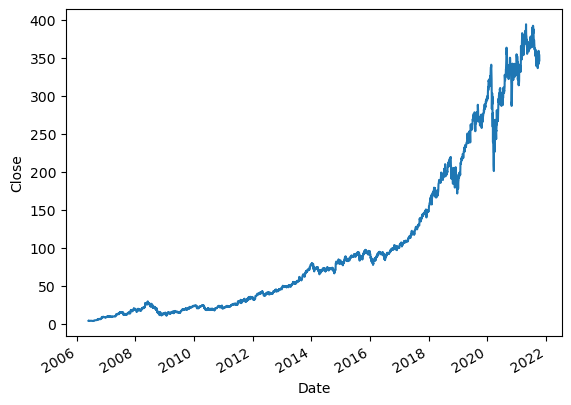

In [8]:
df.sort_values('Date', ascending=True).Close.plot.line(xlabel='Date', ylabel='Close') 
#sort

Linear Regression prediction with test_size=0.2 the label is close

In [10]:
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-28,306.637012,308.326758,304.181926,304.480103,2116300,0.0,0.0
2015-09-17,89.160056,91.267558,89.140805,89.698959,4627000,0.0,0.0


In [ ]:
X = df.iloc[:, [0,1,2,4,5,6]].values
y = df.loc[:,'Close'].values
X.shape


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85, )
X_train.shape

(3097, 6)

### LinearRegression

In [16]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
print(" intercept : ", model[1].intercept_)
print(" coef : ", model[1].coef_)
y_predict_lr= model.predict(X_test)

 intercept :  105.49255408507803
 coef :  [-6.00948460e+01  8.24675968e+01  8.46408643e+01  6.95331786e-03
  2.18489707e-02  0.00000000e+00]


In [88]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / df["Close"].mean()

R2_SCORE:  0.9998873777537246
MSE :  1.1855199076042684
RMSE:  1.0888158281381972
Mean Absolute Error (MAE):  0.5237031988265423
MAPE:  0.005970020069328038


0.010381270499265701

### Ridge + Polynomial

In [23]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=3, include_bias=False), 
              Ridge(alpha=10))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

In [24]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_ridge_poly))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)) / df["Close"].mean()

R2_SCORE:  0.9998436277248163
MSE :  1.6460552986514871
RMSE:  1.2829868661258723
Mean Absolute Error (MAE):  0.7269963674923812
MAPE:  0.012935517806572268


0.01223258641182002

### PolynomialFeatures

In [26]:
print("before: ", X_train.shape)
polyRegressor = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = polyRegressor.fit_transform(X_train)
print("after: ", X_train_poly.shape)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
prediction_plr = poly.predict(X_test_poly)

before:  (3097, 6)
after:  (3097, 27)


In [28]:
print("R2_SCORE: ", metrics.r2_score(y_test, prediction_plr))
print("MSE : ", metrics.mean_squared_error(y_test, prediction_plr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, prediction_plr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, prediction_plr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, prediction_plr))
math.sqrt(metrics.mean_squared_error(y_test, prediction_plr)) / df["Close"].mean()

R2_SCORE:  0.9998652957346373
MSE :  1.417966640765647
RMSE:  1.1907840445545308
Mean Absolute Error (MAE):  0.5984534622316132
MAPE:  0.008035460441506319


0.011353482336740264

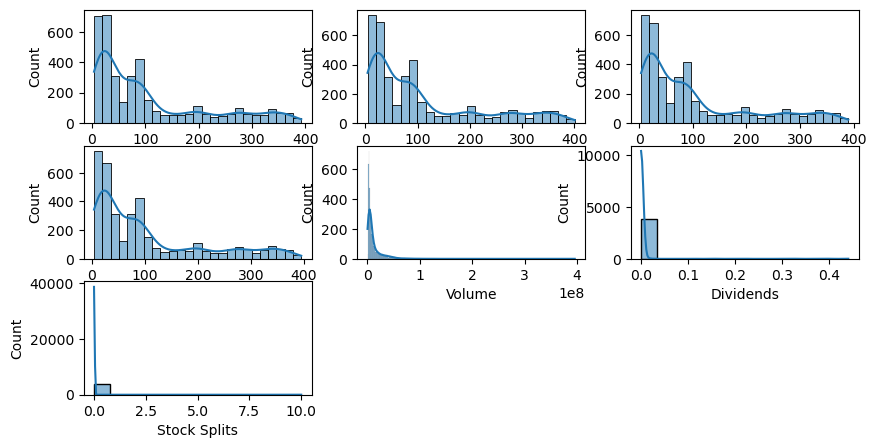

In [36]:
# Open	High	Low	Close	Volume	Dividends	Stock Splits
plt.figure(figsize=(10, 5))
no=330
for col in df.columns:
    no+=1
    plt.subplot(no)
    sns.histplot(df[col] , kde=True)  
    

### improve Model

In [270]:
df2=df[(df['Volume']<1e+08)& (df['Dividends']<0.1) & (df['Volume']<1.5e+07	)& (df['Stock Splits']<1) ]

import numpy as np
from scipy import stats
dfimprove=df2[(np.abs(stats.zscore(df)) <2).all(axis=1)]

/tmp/ipykernel_199/1714710327.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfimprove=df2[(np.abs(stats.zscore(df)) <2).all(axis=1)]


In [271]:
dfimprove.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2651 entries, 2020-07-28 to 2015-08-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2651 non-null   float64
 1   High          2651 non-null   float64
 2   Low           2651 non-null   float64
 3   Close         2651 non-null   float64
 4   Volume        2651 non-null   int64  
 5   Dividends     2651 non-null   float64
 6   Stock Splits  2651 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 165.7 KB


In [272]:
dfimprove.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2651.000000,2651.0
mean,103.973881,104.946097,102.944850,103.986200,5.876577e+06,0.000079,0.0
std,81.419810,82.284709,80.434975,81.405679,3.235707e+06,0.001364,0.0
min,4.084792,4.102467,4.062465,4.083861,6.411000e+05,0.000000,0.0
25%,40.281200,40.656351,39.884139,40.316301,3.316400e+06,0.000000,0.0
50%,83.707664,84.377629,82.843094,83.562302,4.830300e+06,0.000000,0.0
75%,145.072054,146.148948,143.319660,145.174850,7.765050e+06,0.000000,0.0
max,317.343344,318.000126,312.049282,315.562073,1.499100e+07,0.030000,0.0


In [273]:
X = dfimprove.iloc[:, [0,1,2,4,5,6]].values
y = dfimprove.loc[:,'Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85, )
model = make_pipeline(preprocessing.MaxAbsScaler(), LinearRegression())
model.fit(X_train, y_train)
print(" intercept : ", model[1].intercept_)
print(" coef : ", model[1].coef_)
y_predict_lr= model.predict(X_test)

 intercept :  -0.003634039613316986
 coef :  [-1.85278455e+02  2.54517550e+02  2.43751994e+02 -6.32075285e-02
  1.19919360e-01  0.00000000e+00]


In [274]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / df["Close"].mean()

R2_SCORE:  0.9999000653435082
MSE :  0.7516755046010076
RMSE:  0.8669922171513466
Mean Absolute Error (MAE):  0.4776957594077769
MAPE:  0.0044518747637987185


0.00826630224727396

In [277]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=2, include_bias=False), 
              Ridge(alpha=1))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

In [278]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_ridge_poly))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)) / df["Close"].mean()

R2_SCORE:  0.999871817698634
MSE :  0.9641449667475643
RMSE:  0.9819088383081009
Mean Absolute Error (MAE):  0.5807346968582905
MAPE:  0.006390538158184325


0.00936197012632181

In [256]:
df4=pd.DataFrame(X_test)
df5=pd.DataFrame({'ytest':pd.Series(y_test),'yDif':pd.Series(y_test-y_predict_lr), 'y_predict_lr':pd.Series(y_predict_lr)})
df3 = pd.concat([df4, df5], axis=1)
# y_test - y_predict_lr, kde=True)

In [257]:
df3.sort_values('yDif')

,0,1,2,3,4,5,ytest,yDif,y_predict_lr
26,287.040419,295.626710,285.372769,5211800.0,0.0,0.0,288.588928,-4.119192,292.708120
447,249.472346,254.508008,249.462462,6252100.0,0.0,0.0,250.232620,-3.436690,253.669310
478,267.892478,273.610068,267.217493,6354400.0,0.0,0.0,268.726288,-3.373320,272.099608
87,248.013608,253.791740,242.522889,7819300.0,0.0,0.0,245.446640,-2.835259,248.281899
82,302.753777,305.215523,300.847904,2566400.0,0.0,0.0,301.522919,-1.922914,303.445833
...,...,...,...,...,...,...,...,...,...
175,275.488236,275.794694,262.656427,5513100.0,0.0,0.0,269.161285,3.693847,265.467438
389,296.589590,297.780734,288.747775,4512200.0,0.0,0.0,295.596954,4.204136,291.392819
428,289.194418,290.991086,283.050002,3642200.0,0.0,0.0,290.772705,4.911340,285.861365
153,256.348146,258.780116,249.657777,10412100.0,0.0,0.0,258.055481,5.047004,253.008477


<AxesSubplot: ylabel='Count'>

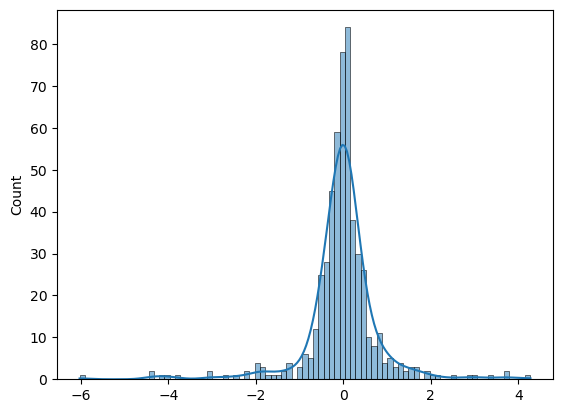

In [279]:
sns.histplot(y_test - y_predict_lr, kde=True)

<AxesSubplot: >

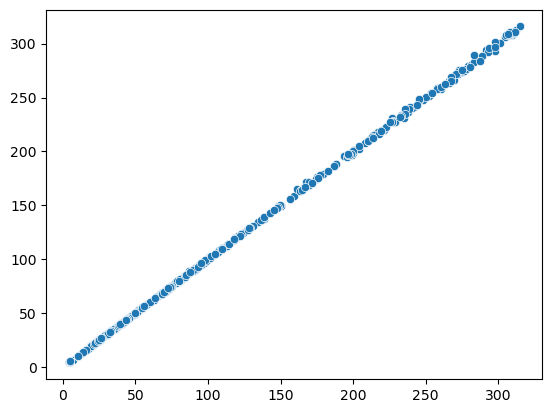

In [280]:
sns.scatterplot(x=y_test, y=y_predict_lr )

2- write run postgress docker command
and save y predicted labeles with datatime in database

In [ ]:
# docker code:
docker run --name postgresql -e POSTGRES_USER=foad -e POSTGRES_PASSWORD=Map@1396 -p 5432:5432 -v /data:/var/lib/postgresql/data -d postgres 

In [ ]:
import psycopg2
import psycopg2.extras
import pandas as pd

In [ ]:
conn = psycopg2.connect(
    host="localhost",
    database="ml",
    user="foad",
    password="mapsa1234")

In [ ]:
cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
cur.execute(f"CREATE TABLE ypridict (id serial PRIMARY KEY, y INT)")
conn.commit()


In [ ]:
INSERT INTO table_name (column_list)
VALUES
    (value_list_1)
    

In [ ]:
cur.execute(f"INSERT INTO ypridict (y) VALUES ({y_predict_lr})")
conn.commit()


3- scrape  https://api.divar.ir/v8/web-search/tehran/buy-apartment?districts=992 api to find token then use https://api.divar.ir/v5/posts/{token} api and save apartment price and location property in json file

### Supervised vs unsupervised


In [ ]:
در روش سوپروایزد اهداف توسط انسان به ماشین داده میشود و تعریف میشود و ماشین با بررسی و یادگیری آنها اهداف تست را پیش بینی میکند. 
در روش یادگیری بدون نظارت ماشین اهداف را خود حدس میزند و طبقه بندی میکند

In [ ]:
what is Semisupevised


In [ ]:
ترکیب دو روش قبلی و استفاده از مزایای هرکدام است به این معنی که از داده های خیلی زیادی که امکان استفاده در روش یادگیری بدون نظارت هست استفاده میشود 
و تعداد از انها توسط انسان لیبل گذاری میشود ماشین با توجه به انها مدل را ایجاد میکند

In [ ]:
what is the effect of Learning rate low and up


In [ ]:
نرخ یادگیری پایین : ممکن است مدل به نقطه بهینه نرسد 
نرخ یادگیری بالا:  ممکن است نقطه بهینه رد شود


In [ ]:
nstance base vs model based


In [ ]:
    یادگیری مدل بیس یک مدل پارامتری ایجاد میکند که با اضافه شدن داده ها پارامترها و مدل الزاما تغییر پیدانمیکنند
مدلهای اینستنس آموزش ابتدایی وجود ندارد 
اما با ورود داده جدید به روز شده و داده های بعدی درلحظه طبقه بندی میشوند و برای طبقه بندی بعدی به حافظه میروند مانند
KNN

In [ ]:
Data is more important or algorithm 


In [ ]:
داده با کیفیت و الگوریتم مناسب هردو لازمه یادگیری ماشین هستند و هرکدام که دچار مشکل شوند این فرآیند به خوبی انجام نمیشود


In [ ]:
what is the meaning of Overfit and underfit and what can we do if they happen?


In [ ]:
Overfit:
    تطابق بیش از حد مدل به داده های آموزش که بعضا باعث پیچیده شدن زیاد مدل میشود
    و باعث میشود نتیجه پیش بینی داده تست با خطای زیاد واریانس همراه شود.
underfit:
    عدم انطباق کافی مدل با داده در فاز یادگیری است که خطای بایاس را زیاد میکند. 
    مدل اگر بیش از حد ساده باشد با عث این خطا میشود.
    
    راهکار:
        برای اورفیت مدل را باید با اعمال جرایم در ضرایب پارامترها ساده تر کرد. 
        مانند روش لاسو و بریج
        
        برای آندرفیت میتوان از روشها غیر خطی یا شبیه آن مانند پلی نمینال استفاده کرد.
        

In [ ]:
روش های گرادیان دیسنت چیست؟



1. BATCH GRADIENT DESCENT:
2. STOCHASTIC GRADIENT DESCENT:
3. MINI-BATCH GRADIENT DESCENT:





